In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
pd.set_option('expand_frame_repr', False)  



In [2]:
# get current price data
def get_current_data(from_sym='BTC', to_sym='USD', exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price'    
    
    parameters = {'fsym': from_sym,
                  'tsyms': to_sym }
    
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange
        
    # response comes as json
    response = requests.get(url, params=parameters)   
    data = response.json()
    
    return data 

In [3]:
# get the historic bitcoin data 
def get_hist_data(from_sym='BTC', to_sym='USD', timeframe = 'day', limit=2000, aggregation=1, exchange=''):
    
    url = 'https://min-api.cryptocompare.com/data/v2/histo'
    url += timeframe
    
    parameters = {'fsym': from_sym,
                  'tsym': to_sym,
                  'limit': limit,
                  'aggregate': aggregation}
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange    
    
    print('baseurl: ', url) 
    print('timeframe: ', timeframe)
    print('parameters: ', parameters)
    
    # response comes as json
    response = requests.get(url, params=parameters)   
    
    data = response.json()['Data']['Data'] 
    
    return data 

In [4]:
# function to convert data into a table which is easier to manipulate
def data_to_dataframe(data):
    #data from json is in array of dictionaries
    df = pd.DataFrame.from_dict(data)
    
    # time is stored as an epoch, we need normal dates
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    print(df.tail())
    
    return df

In [5]:
# visualise the data
def plot_data(df, cryptocurrency, target_currency):
    
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    
    plt.figure(figsize=(15,5))
    plt.title('{} / {} price data'.format(cryptocurrency, target_currency))
    plt.plot(df.index, df.close)
    plt.legend()
    plt.show()
    
    return None

baseurl:  https://min-api.cryptocompare.com/data/v2/histoday
timeframe:  day
parameters:  {'fsym': 'BTC', 'tsym': 'USD', 'limit': 1000, 'aggregate': 1}
                high       low      open  volumefrom      volumeto     close conversionType conversionSymbol
time                                                                                                        
2022-09-30  20180.46  19201.02  19593.46    73013.93  1.428754e+09  19425.63         direct                 
2022-10-01  19482.38  19188.77  19425.63    14808.24  2.860916e+08  19313.96         direct                 
2022-10-02  19394.33  18929.91  19313.96    25352.29  4.857993e+08  19058.15         direct                 
2022-10-03  19697.23  18988.80  19058.15    57248.95  1.106456e+09  19632.35         direct                 
2022-10-04  20241.15  19499.64  19632.35    49735.75  9.917802e+08  20144.49         direct                 


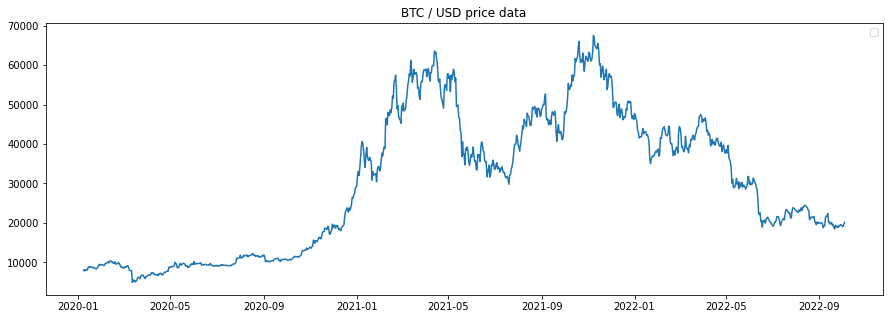

baseurl:  https://min-api.cryptocompare.com/data/v2/histominute
timeframe:  minute
parameters:  {'fsym': 'BTC', 'tsym': 'USD', 'limit': 1440, 'aggregate': 1}
                         high       low      open  volumefrom    volumeto     close conversionType conversionSymbol
time                                                                                                               
2022-10-04 18:50:00  20169.47  20111.41  20111.41      217.47  4381458.78  20160.93         direct                 
2022-10-04 18:51:00  20163.84  20153.30  20160.93       51.40  1036130.01  20158.74         direct                 
2022-10-04 18:52:00  20160.02  20140.87  20158.74       31.33   631348.55  20152.45         direct                 
2022-10-04 18:53:00  20159.47  20138.30  20152.45       43.33   873216.77  20141.05         direct                 
2022-10-04 18:54:00  20145.07  20141.05  20141.05        0.00        0.00  20145.07         direct                 


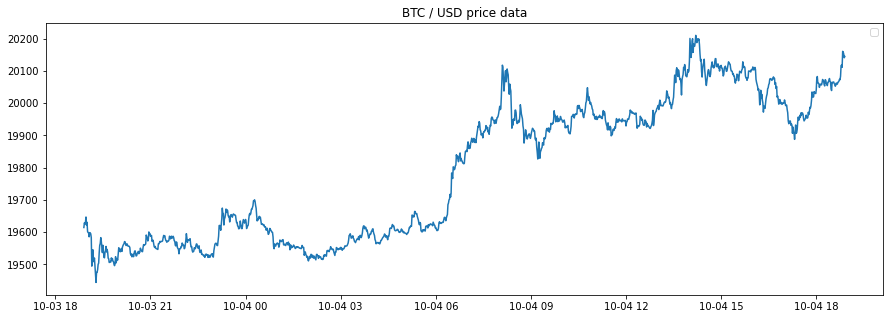

In [6]:
cryptocurrency = 'BTC'
target_currency = 'USD'

# print a graph with daily values
data = get_hist_data(cryptocurrency, target_currency, 'day', 1000)
df = data_to_dataframe(data)

plot_data(df, cryptocurrency, target_currency)

# print a graph with minutely values from the past 24 hours
minute_data = get_hist_data(cryptocurrency, target_currency, 'minute', 1440)
minute_df = data_to_dataframe(minute_data)
plot_data(minute_df, cryptocurrency, target_currency)

In [7]:
# get current price data
current_price = df.iloc[-1:]
current_price



,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2022-10-04,20241.15,19499.64,19632.35,49735.75,9.917802e+08,20144.49,direct,


In [8]:
minute_price = minute_df.iloc[-1:]
m = float(minute_price['close'])

In [9]:
previous_values = minute_df.iloc[:-1]
low_value = previous_values['close'].min()
if m < low_value:
    print('buy')
else:
    print('hold')


hold
